In [29]:
# R script for analyses of activity levels #

#setwd('')


# import data
oaa <- read.csv('./OA_activitydat_20190302_BIOL3207.csv', header=TRUE)
library(car)
library(MASS)

In [30]:
# format dataframe
{
oaa$comment <- as.character(oaa$comment)
oaa$animal_id <- as.character(oaa$animal_id)
oaa$animal_id <- as.integer(oaa$animal_id)
oaa$loc <- as.character(oaa$loc)
oaa$species <- as.character(oaa$species)
oaa$species <- tolower(oaa$species)
oaa$treatment <- relevel(as.factor(oaa$treatment), 'control')
}

#inspect data
str(oaa)
with(oaa, table(species, loc, size))

'data.frame':	589 obs. of  9 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ loc      : chr  "LIRS 2014" "LIRS 2014" "LIRS 2014" "LIRS 2014" ...
 $ species  : chr  "ambon" "ambon" "ambon" "ambon" ...
 $ treatment: Factor w/ 2 levels "control","CO2": 2 2 2 2 2 2 2 2 2 2 ...
 $ animal_id: int  64 65 67 68 74 75 81 84 222 85 ...
 $ sl       : num  57 38.2 39.3 36.1 36.4 ...
 $ size     : chr  "big" "big" "big" "big" ...
 $ activity : num  8.15 10.51 6.51 27.84 36.68 ...
 $ comment  : chr  "27min means of sml+lrg dur, from All Lizard activity data for JJ v2_7 Jun 2017.xlsx" "27min means of sml+lrg dur, from All Lizard activity data for JJ v2_7 Jun 2017.xlsx" "27min means of sml+lrg dur, from All Lizard activity data for JJ v2_7 Jun 2017.xlsx" "27min means of sml+lrg dur, from All Lizard activity data for JJ v2_7 Jun 2017.xlsx" ...


, , size = big

           loc
species     AIMS 2015 LIRS 2014 LIRS 2016
  acantho           0        18        53
  ambon             0        44         0
  chromis           0        34         0
  humbug            0        48        94
  lemon             0        51         0
  whitedams         0         0        52

, , size = small

           loc
species     AIMS 2015 LIRS 2014 LIRS 2016
  acantho          66         0        59
  ambon             0         0         0
  chromis           0         0         0
  humbug            0         0         0
  lemon             0         0         0
  whitedams         0         0        70


In [31]:
# linear models looking at fish length (sl = standard length) and treatment
# separate models by year (= loccation) and species

# acanthochromis

acdat <- oaa[oaa$species=='acantho',]
with(acdat, table(loc, treatment))


           treatment
loc         control CO2
  AIMS 2015      28  38
  LIRS 2014      10   8
  LIRS 2016      63  49

In [32]:
#2014 data
foo <- acdat[acdat$loc=='LIRS 2014',]
ac100 <- lm(activity ~ treatment*sl, data=foo)
drop1(ac100, test='F')
ac101 <- lm(activity ~ treatment + sl, data=foo)
summary(ac101) # final model for acanthos 2014

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,390.4987,59.11737,NA,NA
treatment:sl,1,116.0402,506.5389,61.28020,3.565907,0.08338531



Call:
lm(formula = activity ~ treatment + sl, data = foo)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1311  -3.9870   0.7737   3.2205  12.2490 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.1100     7.8079   6.162 3.42e-05 ***
treatmentCO2   9.6563     3.1215   3.093 0.008553 ** 
sl            -0.5944     0.1125  -5.282 0.000148 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.242 on 13 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7451,	Adjusted R-squared:  0.7059 
F-statistic:    19 on 2 and 13 DF,  p-value: 0.0001383


In [33]:
#2015 data
foo <- acdat[acdat$loc=='AIMS 2015',]
ac110 <- lm(activity ~ treatment*sl, data=foo)
drop1(ac110, test='F')
summary(ac110) # final model

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,2235.108,240.4777,NA,NA
treatment:sl,1,163.5573,2398.665,243.1389,4.53694,0.037147



Call:
lm(formula = activity ~ treatment * sl, data = foo)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5396  -3.7489  -0.2603   4.2788  14.1551 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)      23.3253     9.6002   2.430   0.0180 *
treatmentCO2     19.7591    11.8131   1.673   0.0994 .
sl                0.2972     0.7921   0.375   0.7087  
treatmentCO2:sl  -2.1122     0.9916  -2.130   0.0371 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.004 on 62 degrees of freedom
Multiple R-squared:  0.2312,	Adjusted R-squared:  0.194 
F-statistic: 6.214 on 3 and 62 DF,  p-value: 0.0009275


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,9409.598,504.2705,NA,NA
treatment:sl,1,27.7299,9437.328,502.6001,0.3182738,0.5738166



Call:
lm(formula = activity ~ treatment + sl, data = foo)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.4528  -7.3401   0.8226   7.4992  18.7996 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   38.2415     1.5307  24.983  < 2e-16 ***
treatmentCO2   0.3360     1.7725   0.190     0.85    
sl            -0.3223     0.0422  -7.637 9.14e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.305 on 109 degrees of freedom
Multiple R-squared:  0.3486,	Adjusted R-squared:  0.3366 
F-statistic: 29.16 on 2 and 109 DF,  p-value: 7.161e-11


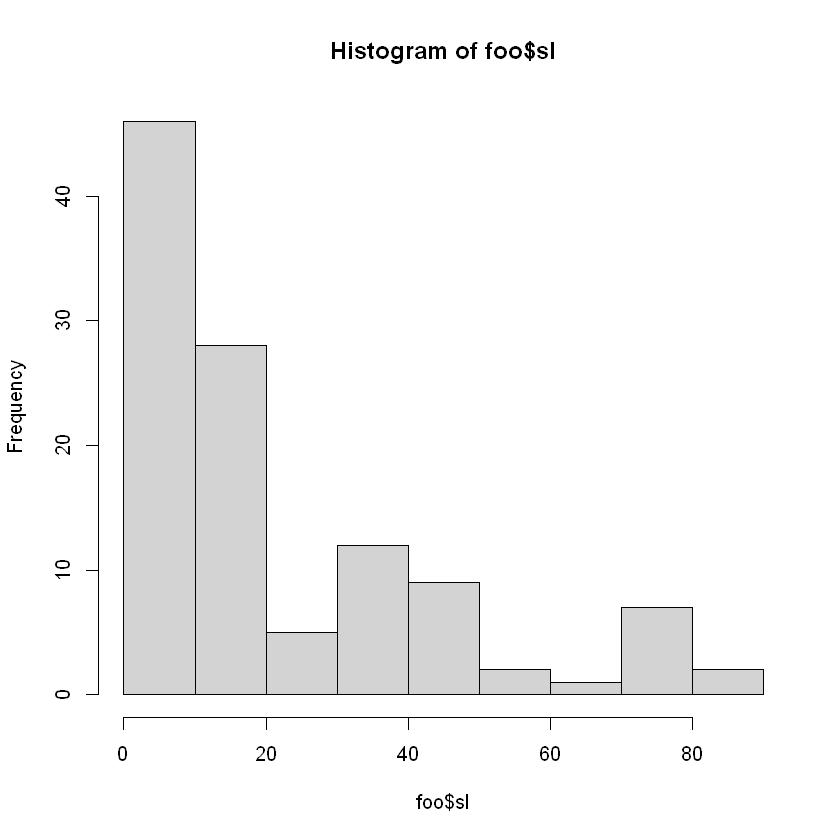

In [34]:
#2016 data
foo <- acdat[acdat$loc=='LIRS 2016',]
hist(foo$sl)
ac120 <- lm(activity ~ treatment*sl, data=foo)
drop1(ac120, test='F')
ac121 <- lm(activity ~ treatment + sl, data=foo)
summary(ac121)

466 326 
 59  40

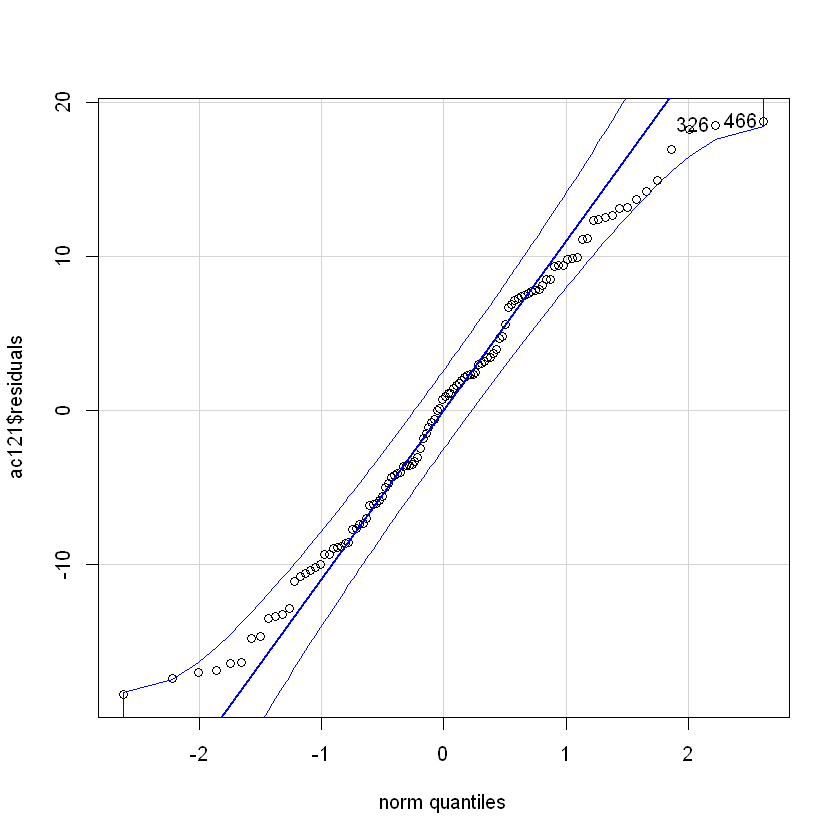

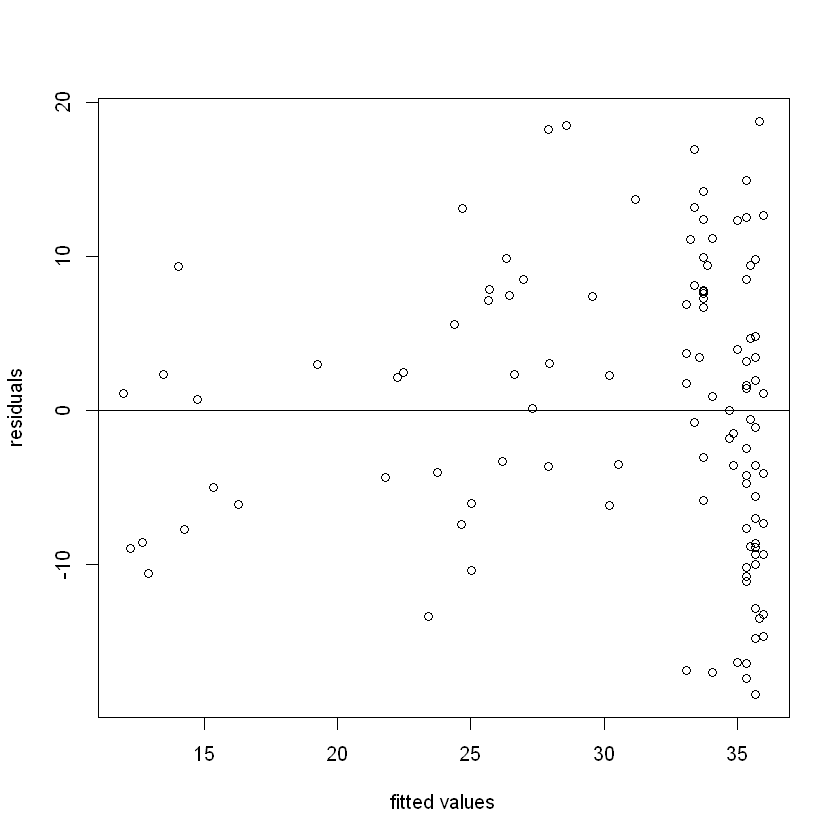

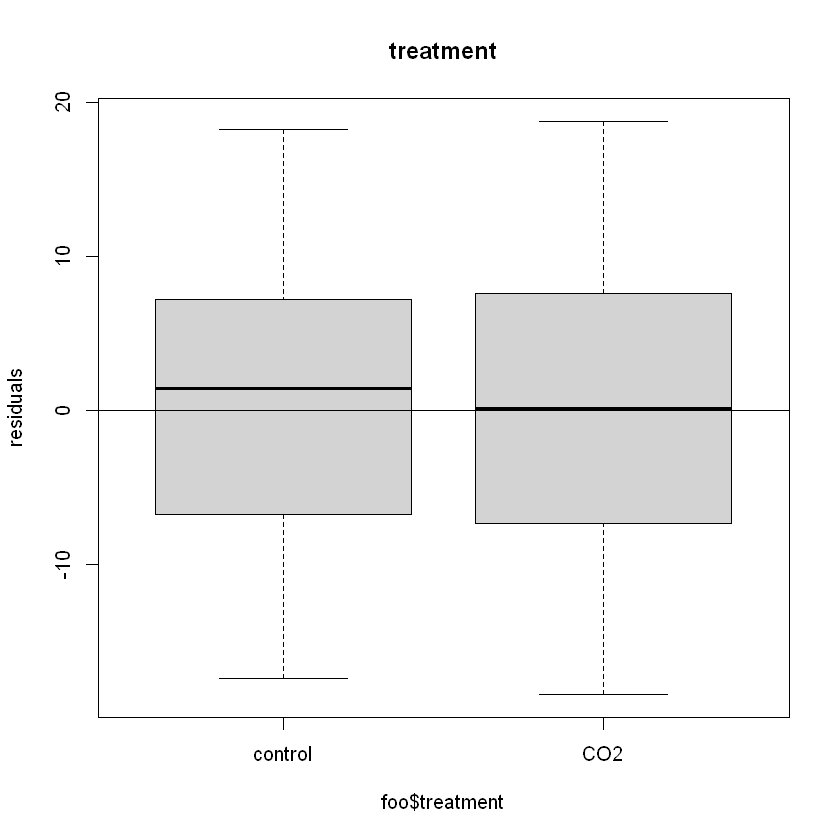

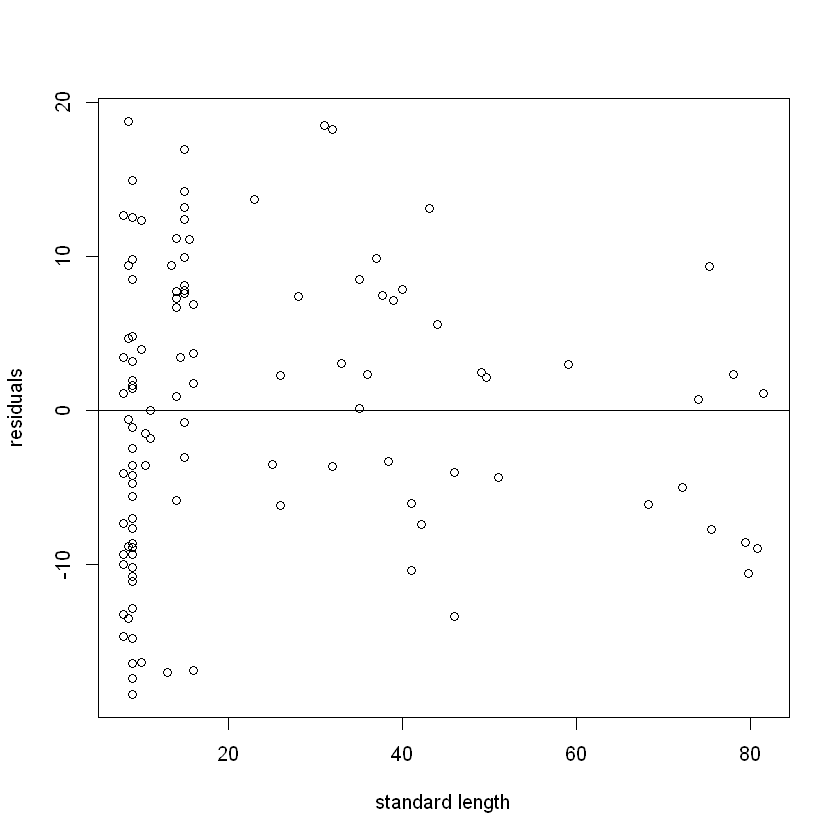

In [35]:
# visual checks of model assumptions
# replace model name as needed
# ensure dataframe (w/ temporary name 'foo') is same one used to fit model
E1 <- resid(ac121)
F1 <- fitted(ac121)

qqp(ac121$residuals)

plot(x = F1, y = E1, xlab = 'fitted values', ylab = 'residuals') 
abline(h = 0)

boxplot(E1 ~ foo$treatment, main = "treatment", ylab = 'residuals')
abline(h = 0)

plot(x = foo$sl, y = E1, xlab = "standard length", ylab = 'residuals') 
abline(h = 0)

In [36]:
# humbugs

humdat <- oaa[oaa$species=='humbug',]

# 2014
foo <- humdat[humdat$loc=='LIRS 2014',]
hum101 <- lm(activity ~ treatment*sl, data=foo)
summary(hum101) # final model
drop1(hum101, test='F') 


# 2016
foo <- humdat[humdat$loc=='LIRS 2016',]
hum121 <- lm(activity ~ treatment*sl, data=foo)
summary(hum121)
hum122 <- lm(activity ~ treatment + sl, data=foo)
summary(hum122)
drop1(hum122, test='F')
hum123 <- lm(activity ~ treatment, data=foo)
summary(hum123) # final model


Call:
lm(formula = activity ~ treatment * sl, data = foo)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.0365  -7.3813  -0.1692   6.6783  28.5052 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     25.18606    7.05372   3.571 0.000909 ***
treatmentCO2    31.82498    9.91405   3.210 0.002544 ** 
sl              -0.08302    0.18969  -0.438 0.663871    
treatmentCO2:sl -0.58961    0.26411  -2.232 0.030977 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.61 on 42 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3595,	Adjusted R-squared:  0.3137 
F-statistic: 7.856 on 3 and 42 DF,  p-value: 0.000284


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5660.348,229.3796,NA,NA
treatment:sl,1,671.6419,6331.990,232.5375,4.983609,0.03097726



Call:
lm(formula = activity ~ treatment * sl, data = foo)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.0548  -6.6336   0.3739   7.1706  15.4400 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     42.035305   4.215236   9.972 3.26e-16 ***
treatmentCO2     7.990668   6.033740   1.324    0.189    
sl               0.003052   0.122020   0.025    0.980    
treatmentCO2:sl -0.218985   0.176320  -1.242    0.217    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.438 on 90 degrees of freedom
Multiple R-squared:  0.03351,	Adjusted R-squared:  0.001296 
F-statistic:  1.04 on 3 and 90 DF,  p-value: 0.3787



Call:
lm(formula = activity ~ treatment + sl, data = foo)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.4573  -6.6595   0.8448   7.1227  15.3675 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  45.46388    3.19498  14.230   <2e-16 ***
treatmentCO2  0.89819    1.95380   0.460    0.647    
sl           -0.10182    0.08834  -1.153    0.252    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.466 on 91 degrees of freedom
Multiple R-squared:  0.01695,	Adjusted R-squared:  -0.004658 
F-statistic: 0.7844 on 2 and 91 DF,  p-value: 0.4594


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,8153.964,425.5187,NA,NA
treatment,1,18.93684,8172.901,423.7367,0.2113392,0.6468162
sl,1,119.03509,8273.000,424.8810,1.3284573,0.2520986



Call:
lm(formula = activity ~ treatment, data = foo)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.709  -7.281   1.366   7.016  15.438 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.1351     1.3687  30.784   <2e-16 ***
treatmentCO2   0.9576     1.9566   0.489    0.626    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.483 on 92 degrees of freedom
Multiple R-squared:  0.002597,	Adjusted R-squared:  -0.008245 
F-statistic: 0.2395 on 1 and 92 DF,  p-value: 0.6257


112 109 
 16  13

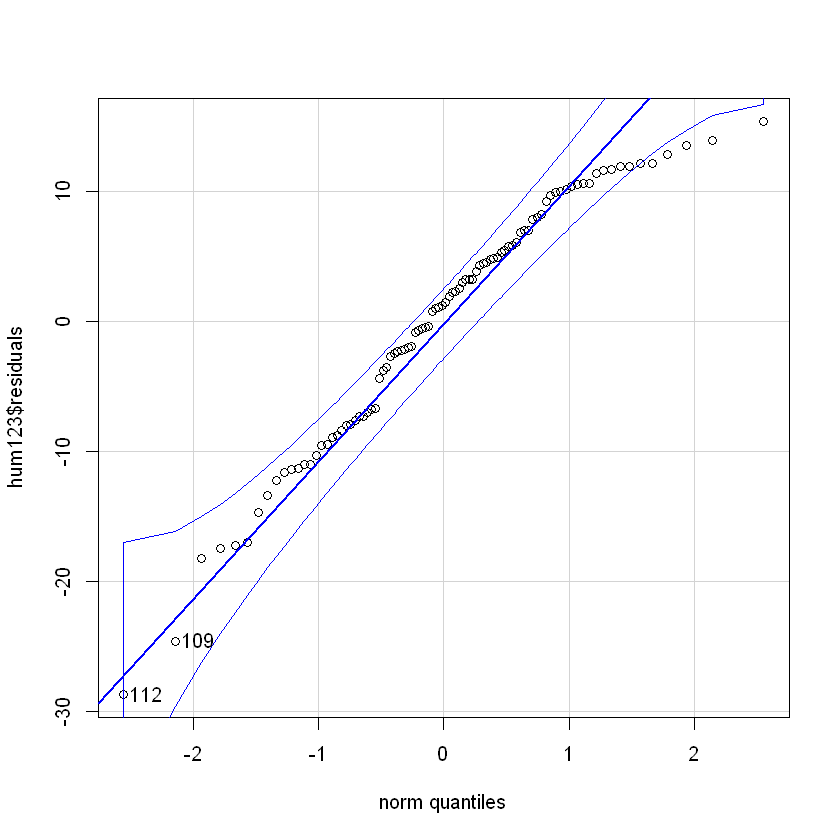

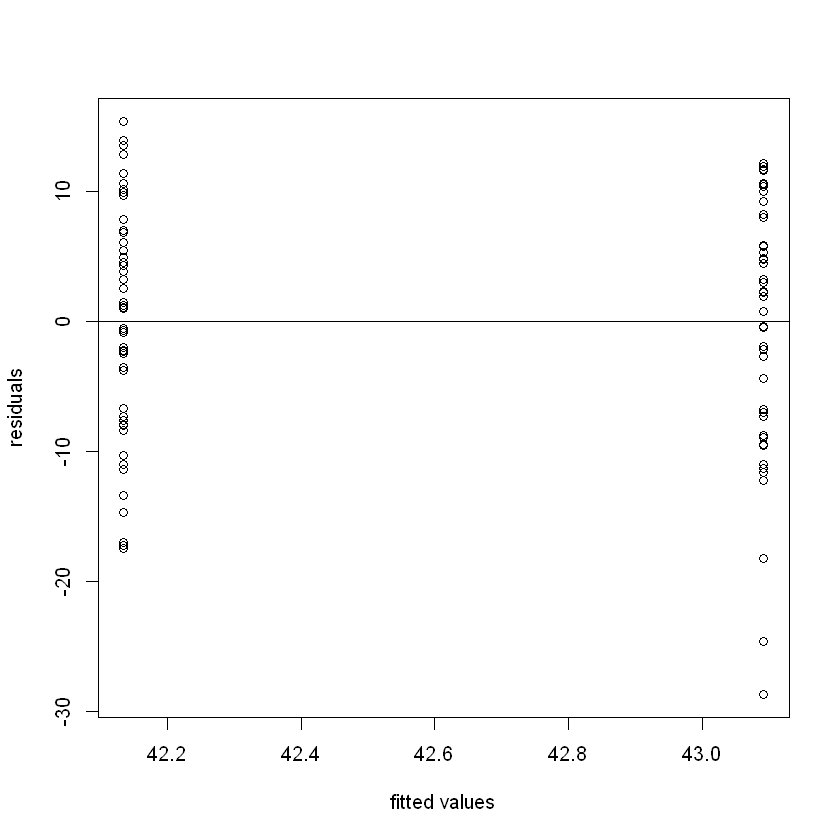

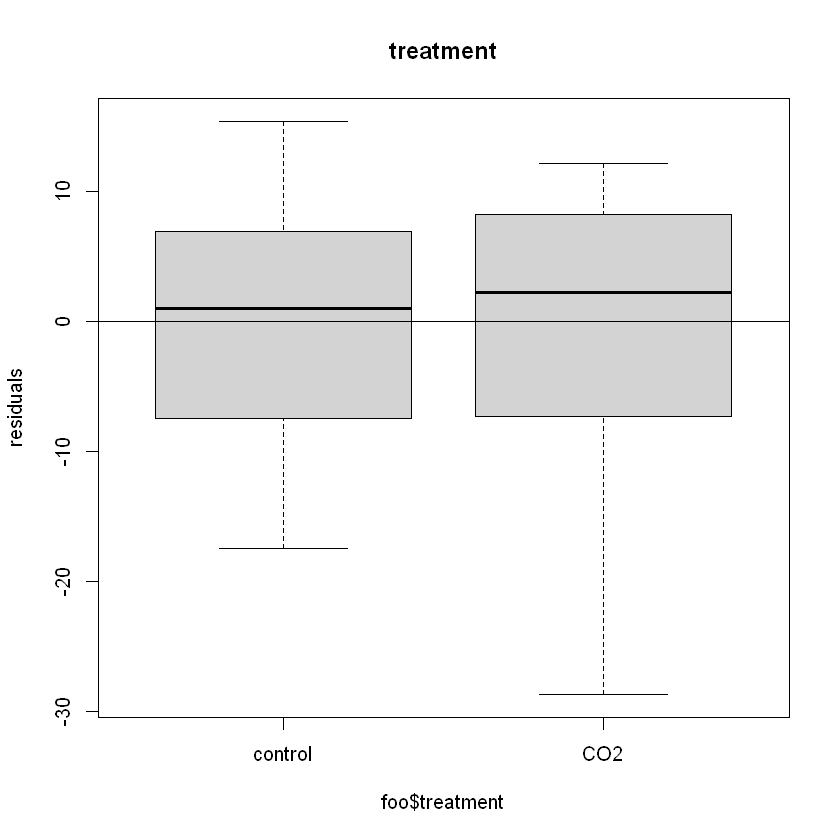

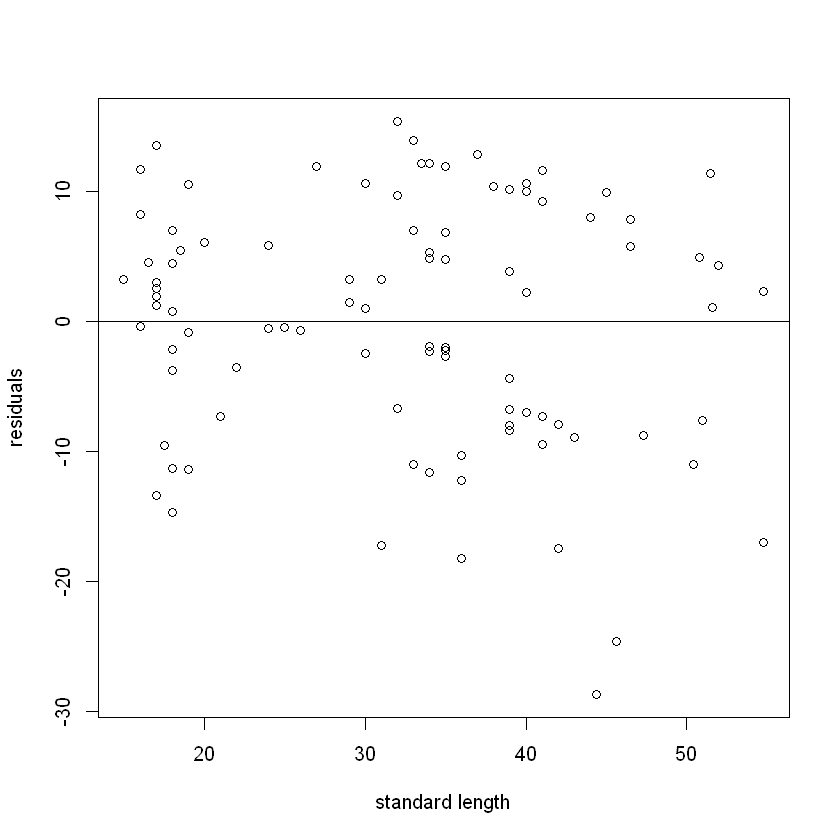

In [37]:
# visual checks of model assumptions
# replace model name as needed
# ensure dataframe (w/ temporary name 'foo') is same one used to fit model
E1 <- resid(hum123)
F1 <- fitted(hum123)

qqp(hum123$residuals)

plot(x = F1, y = E1, xlab = 'fitted values', ylab = 'residuals') 
abline(h = 0)

boxplot(E1 ~ foo$treatment, main = "treatment", ylab = 'residuals')
abline(h = 0)

plot(x = foo$sl, y = E1, xlab = "standard length", ylab = 'residuals') 
abline(h = 0)

In [38]:
# lemons
lemdat <- na.omit(oaa[oaa$species=='lemon',])
lem1 <- lm(activity ~ sl*treatment, data=lemdat)
drop1(lem1, test='F')

lem2 <- lm(activity ~ sl + treatment, data=lemdat)
drop1(lem2, test='F')

lem3 <- lm(activity ~ treatment, data=lemdat)
drop1(lem3, test='F')
summary(lem3) # final model

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5672.864,240.8298,NA,NA
sl:treatment,1,486.022,6158.886,242.8577,3.85537,0.05578408


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,6158.886,242.8577,NA,NA
sl,1,358.5110,6517.397,243.6301,2.677677,0.10858883
treatment,1,450.9464,6609.833,244.3202,3.368066,0.07294211


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,6517.397,243.6301,NA,NA
treatment,1,453.5159,6970.913,244.9264,3.270515,0.0769356



Call:
lm(formula = activity ~ treatment, data = lemdat)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.1846  -9.5977  -0.2243   8.1864  29.5331 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    19.798      2.150   9.208 4.28e-12 ***
treatmentCO2    6.244      3.453   1.808   0.0769 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.78 on 47 degrees of freedom
Multiple R-squared:  0.06506,	Adjusted R-squared:  0.04517 
F-statistic: 3.271 on 1 and 47 DF,  p-value: 0.07694


205 229 
 27  49

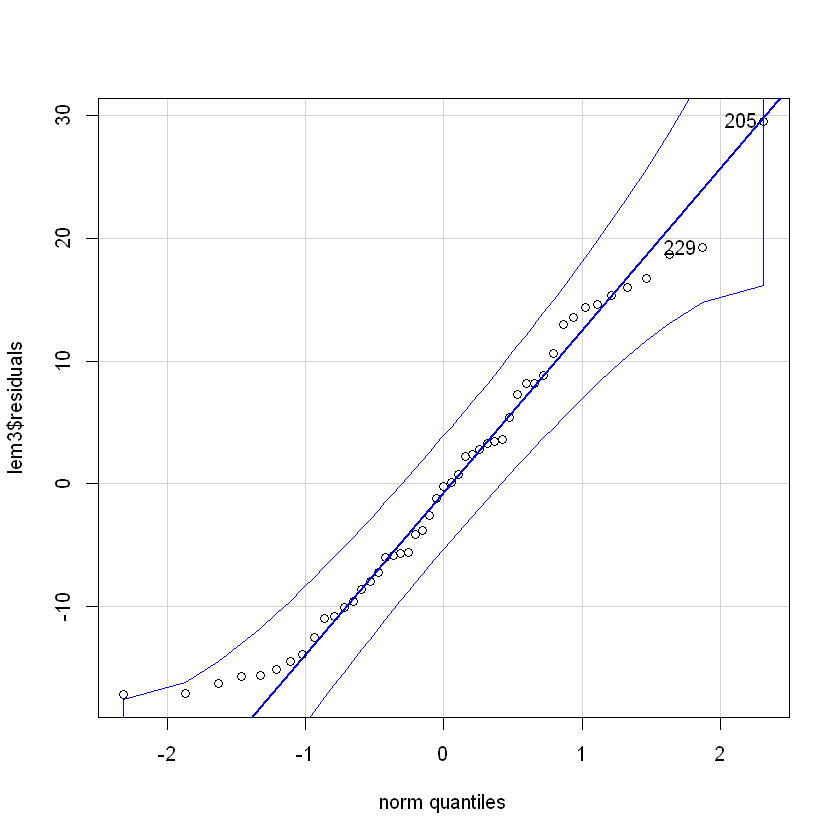

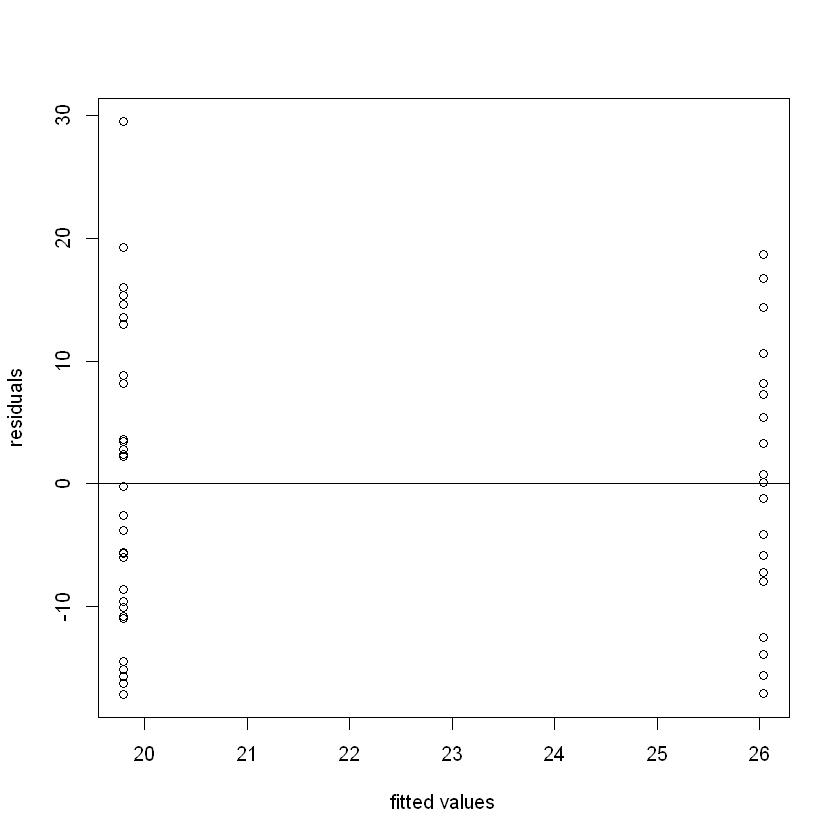

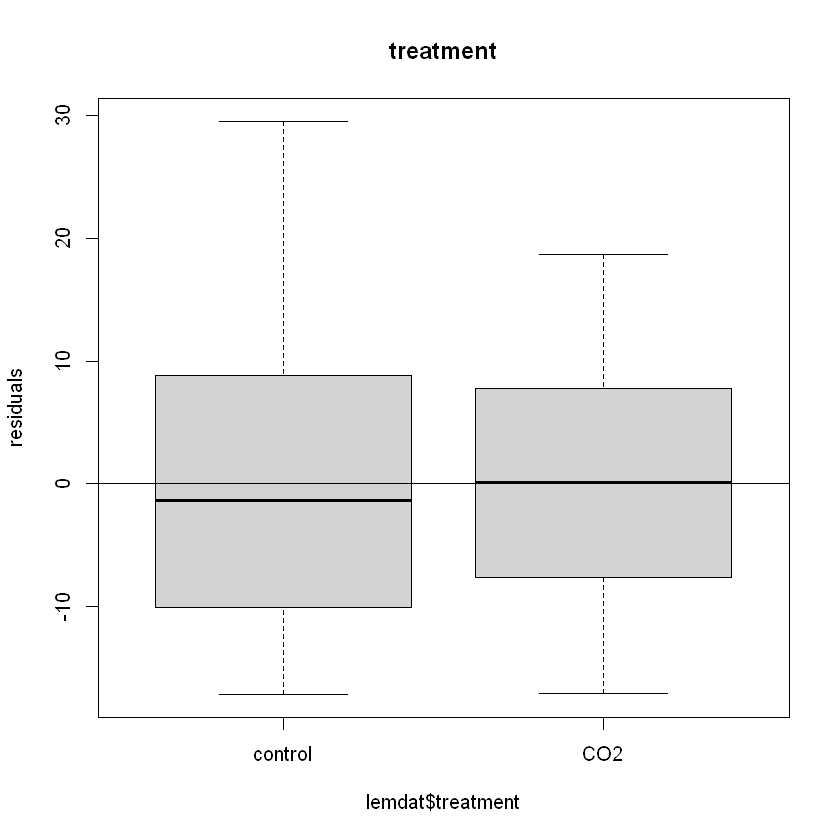

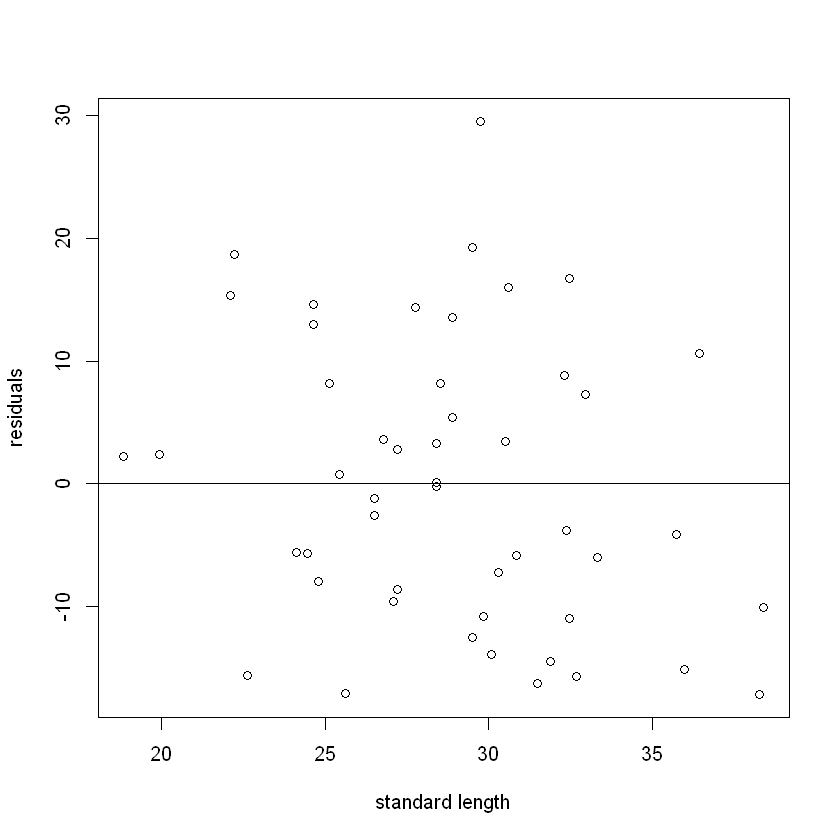

In [39]:
# visual checks of model assumptions
# replace model name as needed
# ensure dataframe is same one used to fit model
E1 <- resid(lem3)
F1 <- fitted(lem3)
qqp(lem3$residuals)

plot(x = F1, y = E1, xlab = 'fitted values', ylab = 'residuals') 
abline(h = 0)

boxplot(E1 ~ lemdat$treatment, main = "treatment", ylab = 'residuals')
abline(h = 0)

plot(x = lemdat$sl, y = E1, xlab = "standard length", ylab = 'residuals') 
abline(h = 0)

In [40]:
# white damsels 

wdat <- oaa[oaa$species=='whitedams',]

dams1 <- lm(activity ~ sl*treatment, data=wdat)
drop1(dams1, test='F')

dams2 <- lm(activity ~ treatment + sl, data=wdat)
drop1(dams2, test='F')

summary(dams2) # final model

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,10288.99,549.0467,NA,NA
sl:treatment,1,6.233312,10295.23,547.1206,0.07148715,0.7896504


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,10295.23,547.1206,NA,NA
treatment,1,113.6153,10408.84,546.4596,1.313251,2.541061e-01
sl,1,2819.1818,13114.41,574.6484,32.586233,8.523174e-08



Call:
lm(formula = activity ~ treatment + sl, data = wdat)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.3420  -5.5917  -0.3138   5.2421  23.9623 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   35.4676     1.9593  18.102  < 2e-16 ***
treatmentCO2  -1.9314     1.6854  -1.146    0.254    
sl            -0.6359     0.1114  -5.708 8.52e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.301 on 119 degrees of freedom
Multiple R-squared:  0.2244,	Adjusted R-squared:  0.2114 
F-statistic: 17.22 on 2 and 119 DF,  p-value: 2.706e-07


553 575 
 96 118

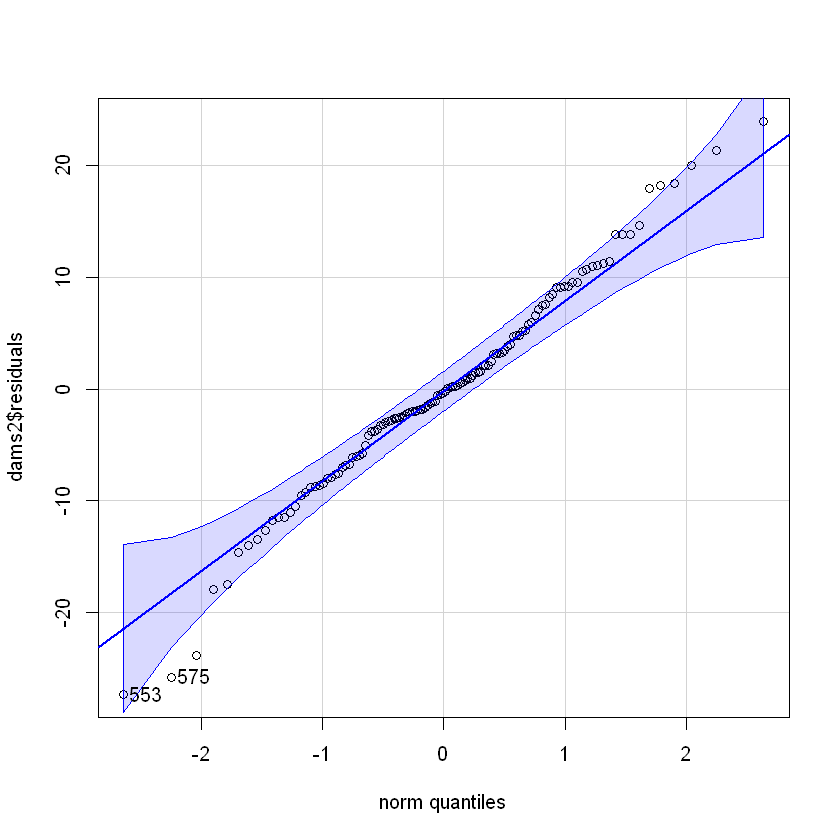

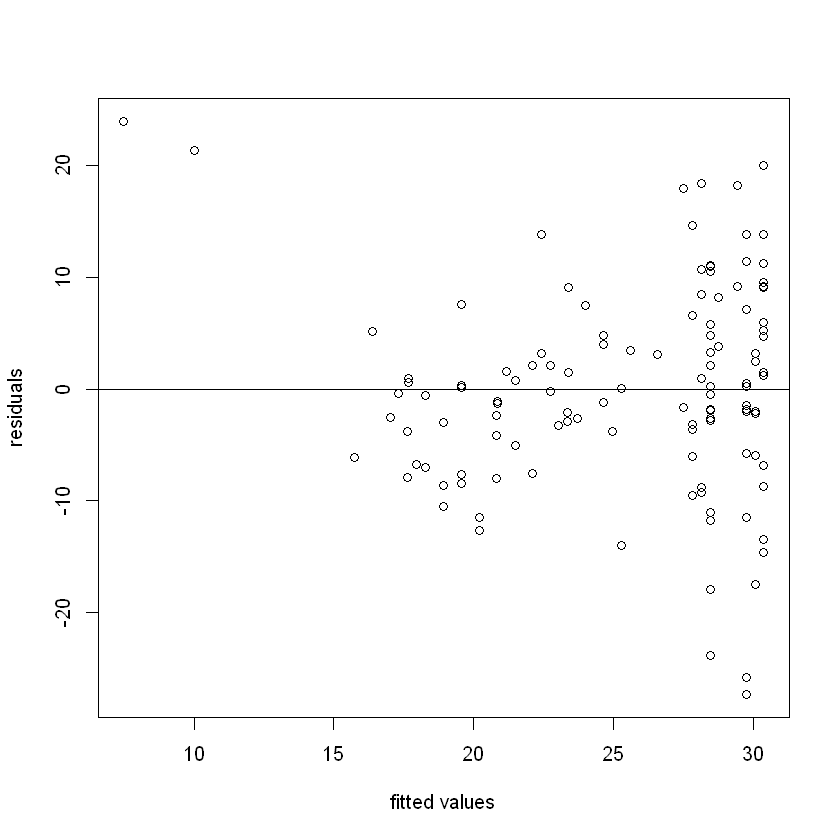

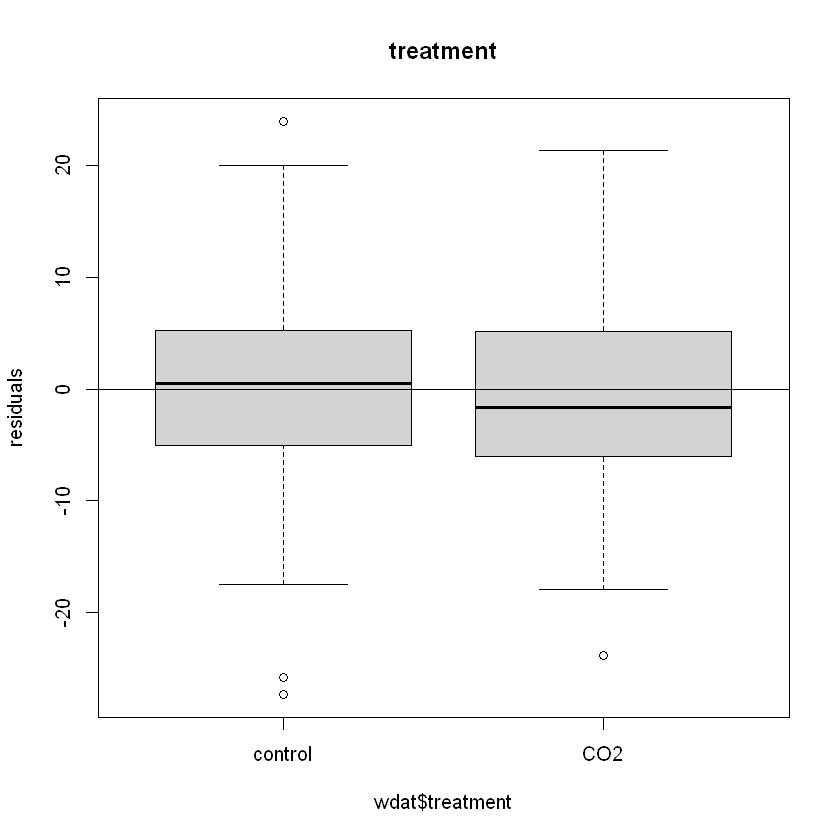

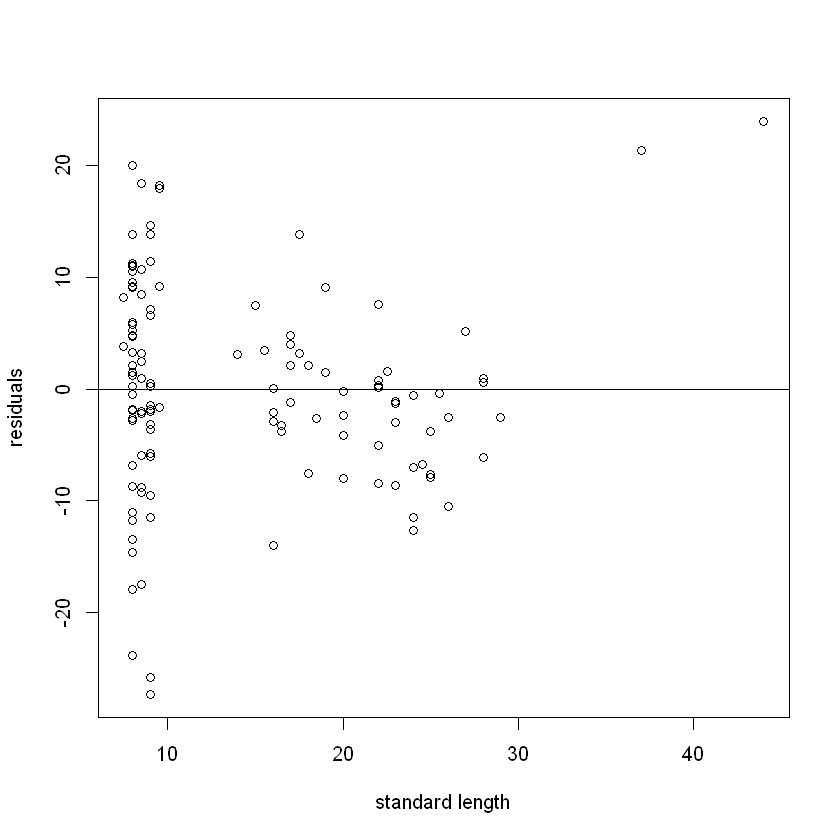

In [41]:
# visual checks of model assumptions
# replace model name as needed
# ensure dataframe is same one used to fit model
E1 <- resid(dams2)
F1 <- fitted(dams2)

qqp(dams2$residuals)

plot(x = F1, y = E1, xlab = 'fitted values', ylab = 'residuals') 
abline(h = 0)

boxplot(E1 ~ wdat$treatment, main = "treatment", ylab = 'residuals')
abline(h = 0)

plot(x = wdat$sl, y = E1, xlab = "standard length", ylab = 'residuals') 
abline(h = 0)

In [42]:
# chromis

chrdat <- oaa[oaa$species=='chromis',]

chr1 <- lm(activity ~ sl*treatment, data=chrdat)
drop1(chr1, test='F')

chr2 <- lm(activity ~ sl + treatment, data=chrdat)
drop1(chr2, test='F')

chr3 <- lm(activity ~ treatment, data=chrdat)
drop1(chr3, test='F')
summary(chr3) # final model

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,3067.392,161.0756,NA,NA
sl:treatment,1,72.5139,3139.906,159.8700,0.7092073,0.4063708


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,3139.906,159.8700,NA,NA
sl,1,8.122243,3148.028,157.9578,0.08019015,0.7789224
treatment,1,12.699839,3152.606,158.0072,0.12538433,0.7256638


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,3148.028,157.9578,NA,NA
treatment,1,14.34391,3162.372,156.1124,0.1458071,0.7050989



Call:
lm(formula = activity ~ treatment, data = chrdat)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2134  -5.6558   0.0888   6.2787  25.2251 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    26.100      2.218  11.768 3.66e-13 ***
treatmentCO2   -1.320      3.456  -0.382    0.705    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.918 on 32 degrees of freedom
Multiple R-squared:  0.004536,	Adjusted R-squared:  -0.02657 
F-statistic: 0.1458 on 1 and 32 DF,  p-value: 0.7051


238 188 
 24  22

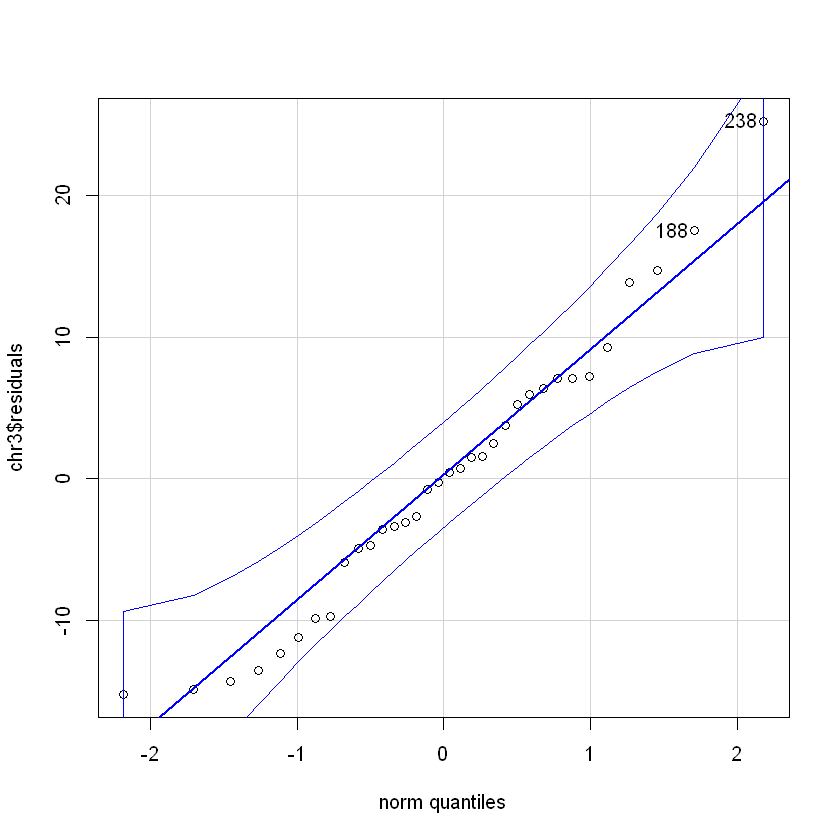

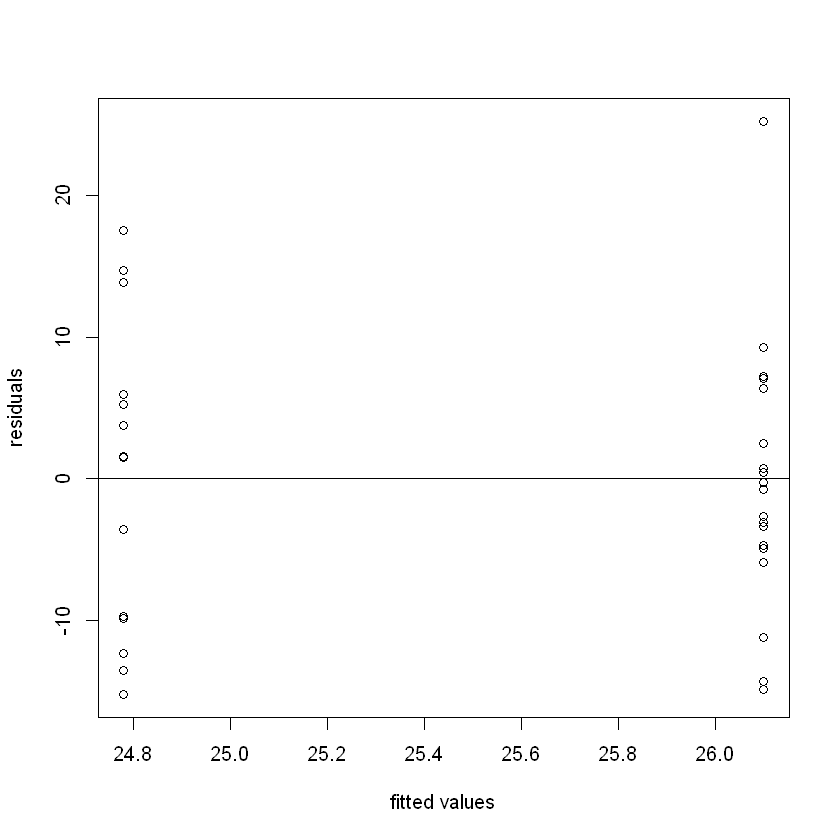

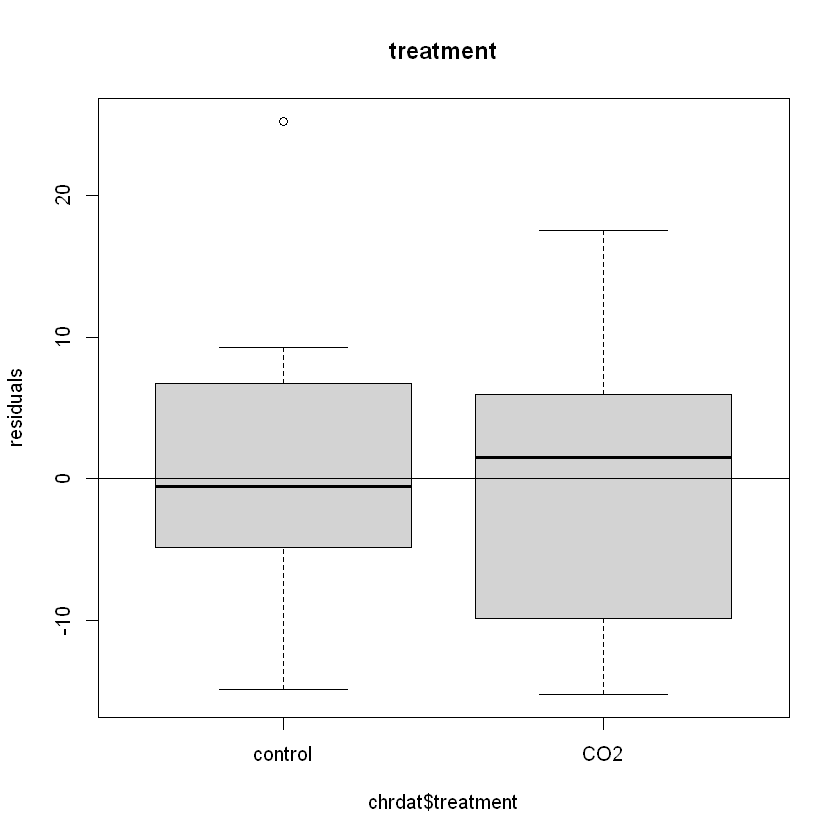

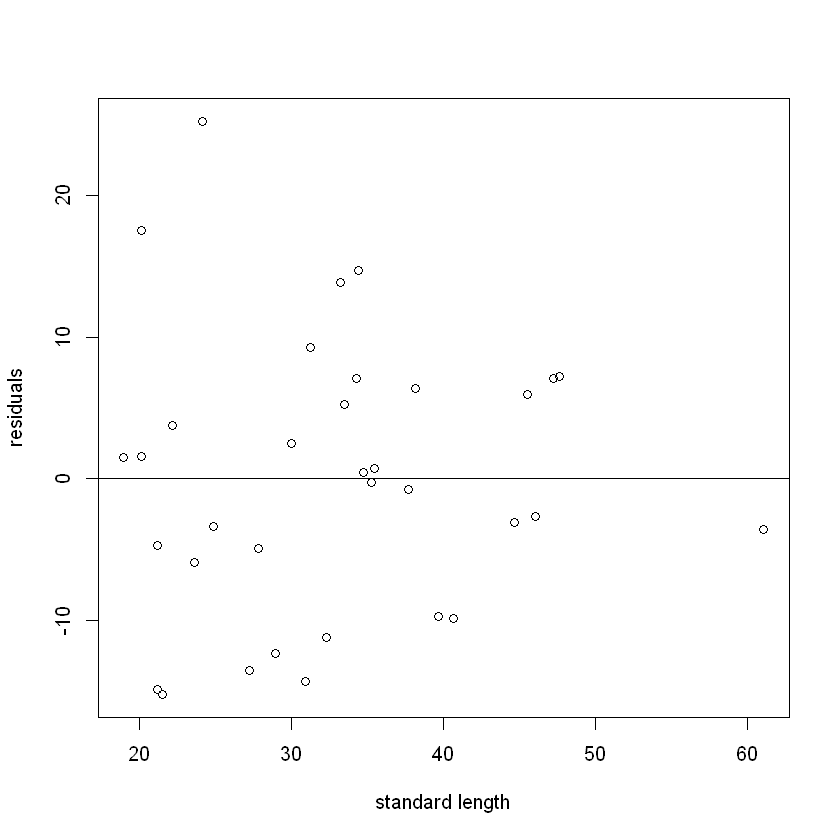

In [43]:
# visual checks of model assumptions
# replace model name as needed
# ensure dataframe is same one used to fit model
E1 <- resid(chr3)
F1 <- fitted(chr3)

qqp(chr3$residuals)

plot(x = F1, y = E1, xlab = 'fitted values', ylab = 'residuals') 
abline(h = 0)

boxplot(E1 ~ chrdat$treatment, main = "treatment", ylab = 'residuals')
abline(h = 0)

plot(x = chrdat$sl, y = E1, xlab = "standard length", ylab = 'residuals') 
abline(h = 0)

In [44]:
# ambons

ambdat <- na.omit(oaa[oaa$species=='ambon',])
with(ambdat, table(size, loc))

# linear models
amb1 <- lm(activity ~ sl*treatment, data=ambdat)
drop1(amb1, test='F')

amb2 <- lm(activity ~ sl + treatment, data=ambdat)
drop1(amb2, test='F')

amb3 <- lm(activity ~ treatment, data=ambdat)
drop1(amb3, test='F')
summary(amb3)

# nothing significant.

     loc
size  LIRS 2014
  big        43

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5686.961,218.0434,NA,NA
sl:treatment,1,45.24693,5732.208,216.3842,0.3102941,0.5806828


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5732.208,216.3842,NA,NA
sl,1,16.376464,5748.584,214.5069,0.11427683,0.7370945
treatment,1,9.927923,5742.136,214.4586,0.06927818,0.7937418


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5748.584,214.5069,NA,NA
treatment,1,11.91931,5760.504,212.5959,0.08501079,0.7720885



Call:
lm(formula = activity ~ treatment, data = ambdat)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.369  -9.418  -2.315   7.370  24.402 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    17.341      2.584   6.711 4.22e-08 ***
treatmentCO2    1.053      3.612   0.292    0.772    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.84 on 41 degrees of freedom
Multiple R-squared:  0.002069,	Adjusted R-squared:  -0.02227 
F-statistic: 0.08501 on 1 and 41 DF,  p-value: 0.7721


6 171 
  5  32

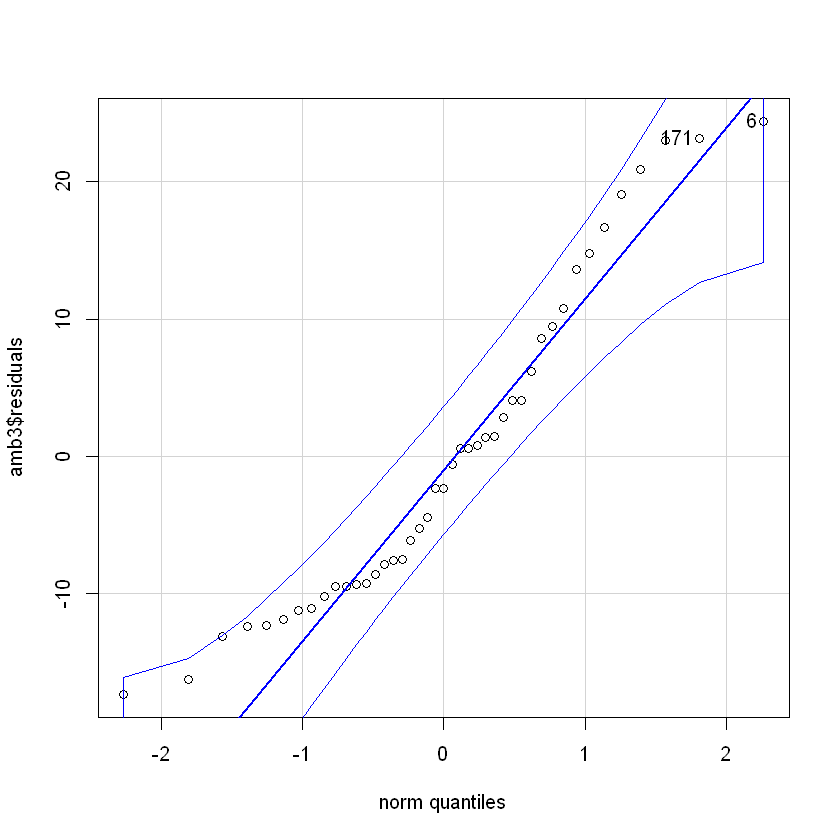

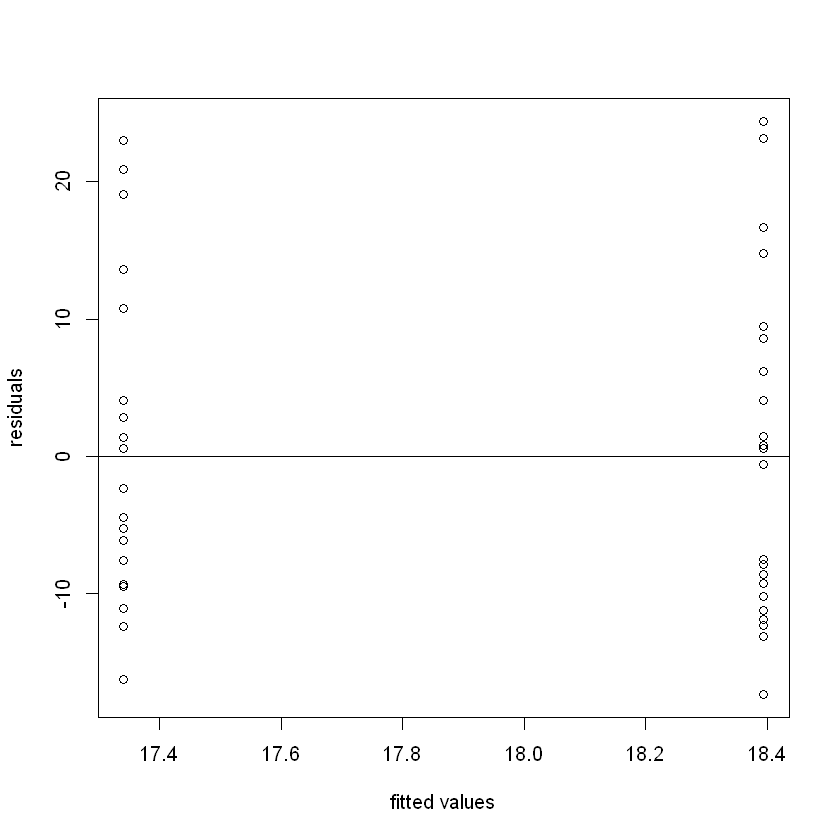

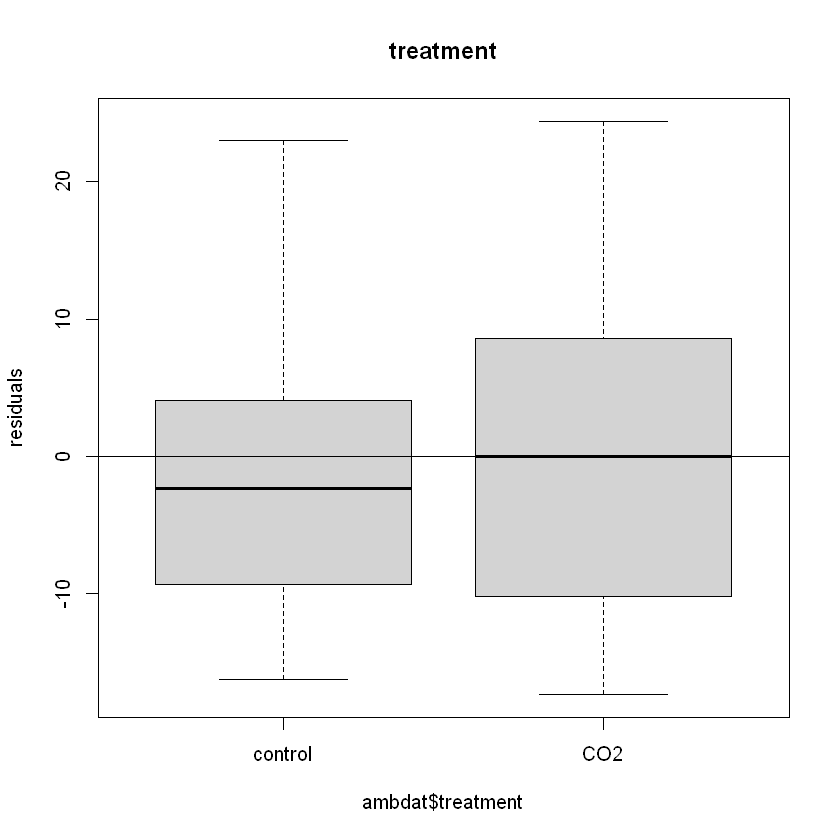

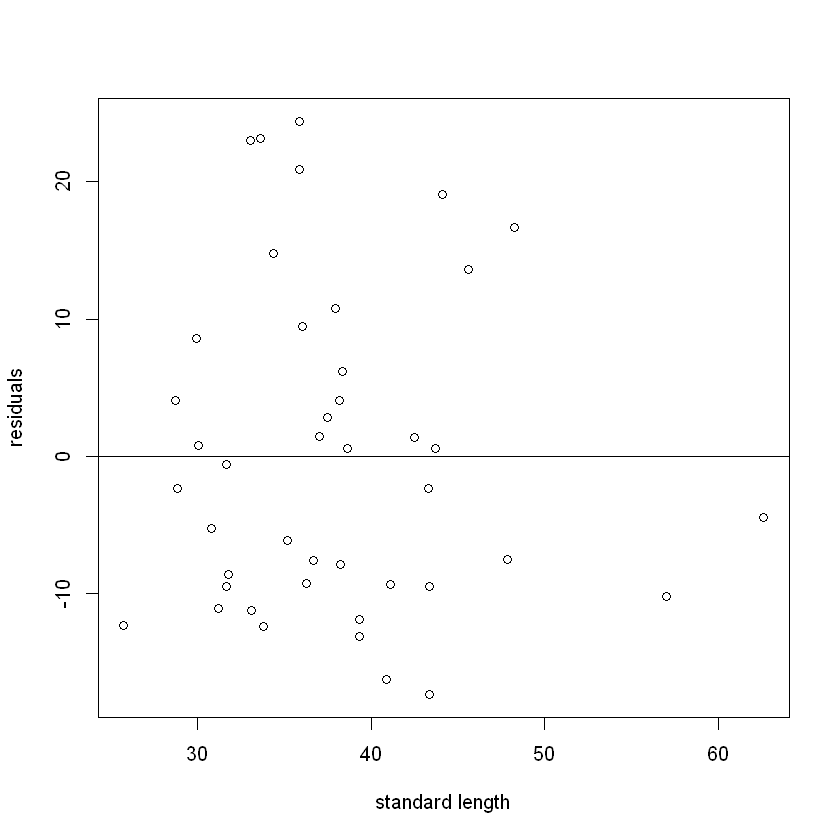

In [45]:
# replace model name as needed
# ensure dataframe is same one used to fit model
E1 <- resid(amb3)
F1 <- fitted(amb3)

qqp(amb3$residuals)

plot(x = F1, y = E1, xlab = 'fitted values', ylab = 'residuals') 
abline(h = 0)

boxplot(E1 ~ ambdat$treatment, main = "treatment", ylab = 'residuals')
abline(h = 0)

plot(x = ambdat$sl, y = E1, xlab = "standard length", ylab = 'residuals') 
abline(h = 0)


# statistics end

In [46]:
# figure for paper
library(scales)
library(plotrix)


file_nm <- 'OA activity scatter_confint_20190304'

# run one of these, then run from the brackets below
jpeg(paste(file_nm, '.jpg', sep=""), width=14, height=6, units='in', res=600)
pdf(paste(file_nm, '.pdf', sep=""), width=14, height=6)


{
  ymin <- 0
  ymax <- 60
  ylab <- seq(from=ymin, to=ymax, by=10)
  
  layout(matrix(c(1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6), 1, 29))
  
  par(mar=c(1, 0, 0, 1), bty='n', oma=c(7, 7, 1, 0))
  
  # acanthos
  plot(NA, ylim=c(-3, ymax), xlim=c(0.4, 3.6), xaxt = 'n', yaxt = 'n')
  
  rect(-5000, -5000, 10000, 10000, col='grey92')
  abline(v = c(0.8, 1.2, 1.8, 2.2, 2.8, 3.2), lwd=3.6, col='white')
  abline(h = c(ylab), lwd=3.6, col='white')
  
  #2014
  foo <- oaa[oaa$species=='acantho' & oaa$loc=='LIRS 2014',]
  
  points(activity ~ jitter(as.numeric(treatment)-0.2, 11), data=foo[foo$treatment=='control',], lwd=1, pch=18, col = 'grey40', cex=1.1)
  points(activity ~ jitter(as.numeric(treatment)-0.8, 5.5), data=foo[foo$treatment=='CO2',], lwd=1, pch=16, col = 'dodgerblue2')
  
  axis(2, at = ylab, labels = ylab, lty=0, tick=NA, cex.axis=2, las=2)
  mtext(expression(paste('Activity duration (', 's min'^'-1', ')')), side=2, line=3.25, cex=2)
  
  #mtext(expression(italic('A. polyacanthus')), cex=1.5, side=3, line=1)
  
  text(0.6, 58, labels = 'A', cex=3.4, font=2)
  
  points(x = 0.8, y = mean(foo[foo$treatment=='control',]$activity), cex=2.6, pch=16, col = 'grey40')
  segments(x0 = 0.8, x1 = 0.8, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.65, x1 = 0.95, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.65, x1 = 0.95, 
           y0 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 1.2, x1 = 1.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.05, x1 = 1.35, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.05, x1 = 1.35, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  points(x = 1.2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=21, col = 'dodgerblue2', bg='white', lwd=4)
  
  axis(1, at = c(0.8, 1.2), labels = c('Control', expression(paste('CO'[2]))), lty=0, tick=NA, cex.axis=2, las=2)
  
  
  #2015
  foo <- oaa[oaa$species=='acantho' & oaa$loc=='AIMS 2015',]
  
  points(activity ~ jitter(as.numeric(treatment)+0.8, 3), data=foo[foo$treatment=='control',], lwd=1, pch=18, col = 'grey40', cex=1.1)
  points(activity ~ jitter(as.numeric(treatment)+0.2, 3), data=foo[foo$treatment=='CO2',], lwd=1, pch=16, col = 'dodgerblue2')
  
  points(x = 1.8, y = mean(foo[foo$treatment=='control',]$activity), cex=2.6, pch=16, col = 'grey40')
  segments(x0 = 1.8, x1 = 1.8, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 1.65, x1 = 1.95, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 1.65, x1 = 1.95, 
           y0 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  
  segments(x0 = 2.2, x1 = 2.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 2.05, x1 = 2.35, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 2.05, x1 = 2.35, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  points(x = 2.2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=21, col = 'dodgerblue2', bg='white', lwd=4)
  
  axis(1, at = c(1.8, 2.2), labels = c('Control', expression(paste('CO'[2]))), lty=0, tick=NA, cex.axis=2, las=2)
  
  
  # 2016 
  foo <- oaa[oaa$species=='acantho' & oaa$loc=='LIRS 2016',]
  
  points(activity ~ jitter(as.numeric(treatment)+1.8, 2), data=foo[foo$treatment=='control',], lwd=1, pch=18, col = 'grey40', cex=1.1)
  points(activity ~ jitter(as.numeric(treatment)+1.2, 2), data=foo[foo$treatment=='CO2',], lwd=1, pch=16, col = 'dodgerblue2')
  
  points(x = 2.8, y = mean(foo[foo$treatment=='control',]$activity), cex=2.6, pch=16, col = 'grey40')
  segments(x0 = 2.8, x1 = 2.8, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 2.65, x1 = 2.95, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 2.65, x1 = 2.95, 
           y0 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  #points(x = 3.2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=16, col = 'dodgerblue2')
  segments(x0 = 3.2, x1 = 3.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 3.05, x1 = 3.35, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 3.05, x1 = 3.35, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  points(x = 3.2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=21, col = 'dodgerblue2', bg='white', lwd=4)
  
  text(1,-3, labels='2014', cex=2)
  text(2,-3, labels='2015', cex=2)
  text(3,-3, labels='2016', cex=2)
  
  axis(1, at = c(2.8, 3.2), labels = c('Control', expression(paste('CO'[2]))), lty=0, tick=NA, cex.axis=2, las=2)
  
  
  
  
  # humbugs
  plot(NA, ylim=c(-3, ymax), xlim=c(0.4, 2.6), xaxt = 'n', yaxt = 'n')
  
  rect(-5000, -5000, 10000, 10000, col='grey92')
  abline(v = c(0.8, 1.2, 1.8, 2.2), lwd=3.6, col='white')
  abline(h = c(ylab), lwd=3.6, col='white')
  
  
  #2014
  
  foo <- oaa[oaa$species=='humbug' & oaa$loc=='LIRS 2014',]
  
  points(activity ~ jitter(as.numeric(treatment)-0.2, 11), data=foo[foo$treatment=='control',], lwd=1, pch=18, col = 'grey40', cex=1.1)
  points(activity ~ jitter(as.numeric(treatment)-0.8, 5.5), data=foo[foo$treatment=='CO2',], lwd=1, pch=16, col = 'dodgerblue2')
  
  #mtext(expression(italic('D. aruanus')), cex=1.5, side=3, line=1)
  
  text(0.6, 58, labels = 'B', cex=3.4, font=2)
  
  points(x = 0.8, y = mean(foo[foo$treatment=='control',]$activity), cex=2.6, pch=16, col = 'grey40')
  segments(x0 = 0.8, x1 = 0.8, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.65, x1 = 0.95, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.65, x1 = 0.95, 
           y0 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  #points(x = 1.2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=16, col = 'dodgerblue2')
  segments(x0 = 1.2, x1 = 1.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.05, x1 = 1.35, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.05, x1 = 1.35, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  points(x = 1.2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=21, col = 'dodgerblue2', bg='white', lwd=4)
  
  
  
  # 2016
  
  foo <- oaa[oaa$species=='humbug' & oaa$loc=='LIRS 2016',]
  
  points(activity ~ jitter(as.numeric(treatment)+0.8, 3), data=foo[foo$treatment=='control',], lwd=1, pch=18, col = 'grey40', cex=1.1)
  points(activity ~ jitter(as.numeric(treatment)+0.2, 3), data=foo[foo$treatment=='CO2',], lwd=1, pch=16, col = 'dodgerblue2')
  
  
  points(x = 1.8, y = mean(foo[foo$treatment=='control',]$activity), cex=2.6, pch=16, col = 'grey40')
  segments(x0 = 1.8, x1 = 1.8, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 1.65, x1 = 1.95, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 1.65, x1 = 1.95, 
           y0 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  #points(x = 2.2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=16, col = 'dodgerblue2')
  segments(x0 = 2.2, x1 = 2.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 2.05, x1 = 2.35, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 2.05, x1 = 2.35, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  points(x = 2.2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=21, col = 'dodgerblue2', bg='white', lwd=4)
  
  
  text(1,-3, labels='2015', cex=2)
  text(2,-3, labels='2016', cex=2)
  
  axis(1, at = c(1.8, 2.2), labels = c('Control', expression(paste('CO'[2]))), lty=0, tick=NA, cex.axis=2, las=2)
  axis(1, at = c(0.8, 1.2), labels = c('Control', expression(paste('CO'[2]))), lty=0, tick=NA, cex.axis=2, las=2)
  
  
  
  # chromis
  plot(NA, ylim=c(-3, ymax), xlim=c(0.4, 2.6), xaxt = 'n', yaxt = 'n')
  
  rect(-5000, -5000, 10000, 10000, col='grey92')
  abline(v = c(1:2), lwd=3.6, col='white')
  abline(h = c(ylab), lwd=3.6, col='white')
  #points(activity ~ jitter(as.numeric(treatment), 1.2), data=oaa[oaa$species=='chromis',], lwd=1, pch=1)
  foo <- oaa[oaa$species=='chromis',]
  
  points(activity ~ jitter(as.numeric(treatment), 10), data=foo[foo$treatment=='control',], lwd=1, pch=18, col = 'grey40', cex=1.1)
  points(activity ~ jitter(as.numeric(treatment), 5), data=foo[foo$treatment=='CO2',], lwd=1, pch=16, col = 'dodgerblue2')
  
  #mtext(expression(italic('C. atripectoralis')), cex=1.5, side=3, line=1)
  axis(1, at = c(1,2), labels = c('Control', expression(paste('CO'[2]))), lty=0, tick=NA, cex.axis=2, las=2)
  
  text(1.5,-3, labels='2014', cex=2)
  text(0.6, 58, labels = 'C', cex=3.4, font=2)
  
  points(x = 1, y = mean(foo[foo$treatment=='control',]$activity), cex=2.6, pch=16, col = 'grey40')
  segments(x0 = 1, x1 = 1, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.8, x1 = 1.2, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.8, x1 = 1.2, 
           y0 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  #points(x = 2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=16, col = 'dodgerblue2')
  segments(x0 = 2, x1 = 2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.8, x1 = 2.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.8, x1 = 2.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  points(x = 2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=21, col = 'dodgerblue2', bg='white', lwd=4)
  
  
  # ambon
  plot(NA, ylim=c(-3, ymax), xlim=c(0.4, 2.6), xaxt = 'n', yaxt = 'n')
  
  rect(-5000, -5000, 10000, 10000, col='grey92')
  abline(v = c(1:2), lwd=3.6, col='white')
  abline(h = c(ylab), lwd=3.6, col='white')
  #points(activity ~ jitter(as.numeric(treatment), 1.2), data=oaa[oaa$species=='ambon',], lwd=1, pch=1)
  foo <- oaa[oaa$species=='ambon',]
  
  points(activity ~ jitter(as.numeric(treatment), 10), data=foo[foo$treatment=='control',], lwd=1, pch=18, col = 'grey40', cex=1.1)
  points(activity ~ jitter(as.numeric(treatment), 5), data=foo[foo$treatment=='CO2',], lwd=1, pch=16, col = 'dodgerblue2')
  
  mtext(expression(italic('P. amboinensis')), cex=1.5, side=3, line=1)
  axis(1, at = c(1,2), labels = c('Control', expression(paste('CO'[2]))), lty=0, tick=NA, cex.axis=2, las=2)
  text(1.5,-3, labels='2014', cex=2)
  text(0.6, 58, labels = 'D', cex=3.4, font=2)
  
  
  points(x = 1, y = mean(foo[foo$treatment=='control',]$activity), cex=2.6, pch=16, col = 'grey40')
  segments(x0 = 1, x1 = 1, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.8, x1 = 1.2, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.8, x1 = 1.2, 
           y0 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  #points(x = 2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=16, col = 'dodgerblue2')
  segments(x0 = 2, x1 = 2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.8, x1 = 2.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.8, x1 = 2.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  points(x = 2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=21, col = 'dodgerblue2', bg='white', lwd=4)
  
  
  # lemon damsel
  plot(NA, ylim=c(-3, ymax), xlim=c(0.4, 2.6), xaxt = 'n', yaxt = 'n')
  
  rect(-5000, -5000, 10000, 10000, col='grey92')
  abline(v = c(1:2), lwd=3.6, col='white')
  abline(h = c(ylab), lwd=3.6, col='white')
  #points(activity ~ jitter(as.numeric(treatment), 1.2), data=oaa[oaa$species=='lemon',], lwd=1, pch=1)
  foo <- oaa[oaa$species=='lemon',]
  
  points(activity ~ jitter(as.numeric(treatment), 10), data=foo[foo$treatment=='control',], lwd=1, pch=18, col = 'grey40', cex=1.1)
  points(activity ~ jitter(as.numeric(treatment), 5), data=foo[foo$treatment=='CO2',], lwd=1, pch=16, col = 'dodgerblue2')
  
  text(0.6, 58, labels = 'E', cex=3.4, font=2)
  
  # mtext(expression(italic('P. moluccensis')), cex=1.5, side=3, line=1)
  axis(1, at = c(1,2), labels = c('Control', expression(paste('CO'[2]))), lty=0, tick=NA, cex.axis=2, las=2)
  text(1.5,-3, labels='2014', cex=2)
  
  
  points(x = 1, y = mean(foo[foo$treatment=='control',]$activity), cex=2.6, pch=16, col = 'grey40')
  segments(x0 = 1, x1 = 1, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.8, x1 = 1.2, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.8, x1 = 1.2, 
           y0 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  #points(x = 2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=16, col = 'dodgerblue2')
  segments(x0 = 2, x1 = 2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.8, x1 = 2.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.8, x1 = 2.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')  
  points(x = 2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=21, col = 'dodgerblue2', bg='white', lwd=4)
  
  
  
  # white damsels
  plot(NA, ylim=c(-3, ymax), xlim=c(0.4, 2.6), xaxt = 'n', yaxt = 'n')
  
  rect(-5000, -5000, 10000, 10000, col='grey92')
  abline(v = c(1:2), lwd=3.6, col='white')
  abline(h = c(ylab), lwd=3.6, col='white')
  #points(activity ~ jitter(as.numeric(treatment), 1.2), data=oaa[oaa$species=='whitedams',], lwd=1, pch=1)
  foo <- oaa[oaa$species=='whitedams',]
  
  points(activity ~ jitter(as.numeric(treatment), 10), data=foo[foo$treatment=='control',], lwd=1, pch=18, col = 'grey40', cex=1.1)
  points(activity ~ jitter(as.numeric(treatment), 5), data=foo[foo$treatment=='CO2',], lwd=1, pch=16, col = 'dodgerblue2')
  
  #mtext(expression(italic('D. perspicillatus')), cex=1.5, side=3, line=1)
  axis(1, at = c(1,2), labels = c('Control', expression(paste('CO'[2]))), lty=0, tick=NA, cex.axis=2, las=2)
  
  text(0.6, 58, labels = 'F', cex=3.4, font=2)
  text(1.5,-3, labels='2016', cex=2)
  
  points(x = 1, y = mean(foo[foo$treatment=='control',]$activity), cex=2.6, pch=16, col = 'grey40')
  segments(x0 = 1, x1 = 1, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.8, x1 = 1.2, 
           y0 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  segments(x0 = 0.8, x1 = 1.2, 
           y0 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)), 
           y1 = mean(foo[foo$treatment=='control',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='control',]$activity)),
           lwd = 4, col = 'grey40')
  
  #points(x = 2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=16, col = 'dodgerblue2')
  segments(x0 = 2, x1 = 2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.8, x1 = 2.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) - (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  
  segments(x0 = 1.8, x1 = 2.2, 
           y0 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)), 
           y1 = mean(foo[foo$treatment=='CO2',]$activity) + (qnorm(0.975)*std.error(foo[foo$treatment=='CO2',]$activity)),
           lwd = 4, col = 'dodgerblue2')
  points(x = 2, y = mean(foo[foo$treatment=='CO2',]$activity), cex=2.6, pch=21, col = 'dodgerblue2', bg='white', lwd=4)
  
  
  
  
  dev.off()
}

png 
  2

In [47]:
# visualize models that include effects of standard length
# first up, showing acantho models for 2014 and 2015 (nothing significant in 2016)



# acantho stuff first. excluding 2016 cuz nothing going on there.


foo <- oaa[oaa$species=='acantho',]

summary(ac110) # acanthos 2015
summary(ac101) # acanthos 2014


range(foo[foo$loc=='LIRS 2014',]$sl)

# script for predicting from models # 2014 acanthos based on SL range
SL_seq <- seq(from=50, to=92, by=1) #SL
co2_seq <- rep('CO2', length(SL_seq))
control_seq <- rep('control', length(SL_seq))

treatment_seq <- c(control_seq, co2_seq)
sl_seq <- rep(SL_seq, 2)

length(sl_seq)
length(treatment_seq)

fake_data <- data.frame(treatment = treatment_seq, sl = sl_seq) #merge it all into a dataframe
fake_data$treatment <- as.factor(fake_data$treatment)
str(fake_data) #cool, a fake dataset to predict from.
fake_data$treatment <- relevel(as.factor(fake_data$treatment), ref = 'control')

pdat <- predict(ac101, fake_data, se.fit=TRUE)
activity_fit <- data.frame(treatment = treatment_seq, sl=sl_seq, fit = pdat$fit, se = pdat$se.fit)
activity_fit$lci <- activity_fit$fit - (1.96*activity_fit$se) #calculate lower and upper confidence intervals from the standard errors
activity_fit$uci <- activity_fit$fit + (1.96*activity_fit$se)

ac2014fit <- activity_fit



# script for predicting from models # 2015 acanthos.
SL_seq <- seq(from=8, to=14, by=0.5) #SL
co2_seq <- rep('CO2', length(SL_seq))
control_seq <- rep('control', length(SL_seq))

treatment_seq <- c(control_seq, co2_seq)
sl_seq <- rep(SL_seq, 2)

length(sl_seq)
length(treatment_seq)

fake_data <- data.frame(treatment = treatment_seq, sl = sl_seq) #merge it all into a dataframe
str(fake_data) #cool, a fake dataset to predict from.
fake_data$treatment <- relevel(as.factor(fake_data$treatment), ref = 'control')

pdat <- predict(ac110, fake_data, se.fit=TRUE)
activity_fit <- data.frame(treatment = treatment_seq, sl=sl_seq, fit = pdat$fit, se = pdat$se.fit)
activity_fit$lci <- activity_fit$fit - (1.96*activity_fit$se) #calculate lower and upper confidence intervals from the standard errors
activity_fit$uci <- activity_fit$fit + (1.96*activity_fit$se)

ac2015fit <- activity_fit


Call:
lm(formula = activity ~ treatment * sl, data = foo)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5396  -3.7489  -0.2603   4.2788  14.1551 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)      23.3253     9.6002   2.430   0.0180 *
treatmentCO2     19.7591    11.8131   1.673   0.0994 .
sl                0.2972     0.7921   0.375   0.7087  
treatmentCO2:sl  -2.1122     0.9916  -2.130   0.0371 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.004 on 62 degrees of freedom
Multiple R-squared:  0.2312,	Adjusted R-squared:  0.194 
F-statistic: 6.214 on 3 and 62 DF,  p-value: 0.0009275



Call:
lm(formula = activity ~ treatment + sl, data = foo)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1311  -3.9870   0.7737   3.2205  12.2490 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.1100     7.8079   6.162 3.42e-05 ***
treatmentCO2   9.6563     3.1215   3.093 0.008553 ** 
sl            -0.5944     0.1125  -5.282 0.000148 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.242 on 13 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7451,	Adjusted R-squared:  0.7059 
F-statistic:    19 on 2 and 13 DF,  p-value: 0.0001383


[1] 50.11668 92.53242

[1] 86

[1] 86

'data.frame':	86 obs. of  2 variables:
 $ treatment: Factor w/ 2 levels "CO2","control": 2 2 2 2 2 2 2 2 2 2 ...
 $ sl       : num  50 51 52 53 54 55 56 57 58 59 ...


[1] 26

[1] 26

'data.frame':	26 obs. of  2 variables:
 $ treatment: chr  "control" "control" "control" "control" ...
 $ sl       : num  8 8.5 9 9.5 10 10.5 11 11.5 12 12.5 ...


In [48]:
# time to make a plot.

jpeg('acantho activity models_20190304.jpg', width=14, height=7, units='in', res=600)

{
  #define y and x label sequences
  xlab <- seq(from=5, to=95, by=10)
  
  #locations where y-labels will go.
  ylab <- seq(from=0, to=60, by=10)
  
  limX <- c(45, 95)
  limY <- c(-5, 60)
  
  par(mar=c(2,0.5,0.5,0.5)) #plot margins (bottom, left, top, right)
  par(mfrow=c(1,2)) #number of rows and columns in for having murbtiple plots
  par(oma=c(6,8,0,0.5)) #outer margin areas (bottom, left, top, right)
  
  # LIRS 2014
  #empty plot area
  plot(NA, xlim=limX, ylim=limY, main=NULL, xlab=NULL, ylab=NULL, axes=FALSE)
  
  polygon(c(ac2014fit[ac2014fit$treatment=='control',]$sl, 
            rev(ac2014fit[ac2014fit$treatment=='control',]$sl)),
          c(ac2014fit[ac2014fit$treatment=='control',]$uci,
            rev(ac2014fit[ac2014fit$treatment=='control',]$lci)), col = alpha("grey75", 0.5), border = NA)
  
  polygon(c(ac2014fit[ac2014fit$treatment=='CO2',]$sl, 
            rev(ac2014fit[ac2014fit$treatment=='CO2',]$sl)),
          c(ac2014fit[ac2014fit$treatment=='CO2',]$uci,
            rev(ac2014fit[ac2014fit$treatment=='CO2',]$lci)), col = alpha("grey75", 0.5), border = NA)
  
  points(activity ~ sl, data=foo[foo$treatment=='control' & foo$loc=='LIRS 2014',], cex=1.2, pch=18, col = 'grey40')
  
  points(activity ~ sl, data=foo[foo$treatment=='CO2' & foo$loc=='LIRS 2014',], cex=1.1, pch=16, col = 'dodgerblue2')
  
  lines(x = ac2014fit[ac2014fit$treatment=='CO2',]$sl, 
        y = ac2014fit[ac2014fit$treatment=='CO2',]$fit, lwd=3, col = 'dodgerblue2')
  lines(x = ac2014fit[ac2014fit$treatment=='control',]$sl, 
        y = ac2014fit[ac2014fit$treatment=='control',]$fit, lwd=3, col = 'grey40')
  
  axis(1, at = xlab, labels=xlab, cex.axis=1.6)
  axis(2, at = ylab, labels=ylab, cex.axis=1.6, las=2)
  
  mtext(expression(paste('Activity duration (', 's min'^'-1', ')')), side=2, line=3.25, cex=2)
  mtext('Standard length (mm)', side=1, at = 95, line=4, cex=2)
  
  text(x = 85, y = 55, labels = 'LIRS 2014', cex=2)
  
  box(lwd=1.6)
  
  
  
  # 2016
  
  limX <- c(8,14)
  
  plot(NA, xlim=limX, ylim=limY, main=NULL, xlab=NULL, ylab=NULL, axes=FALSE)
  
  polygon(c(ac2015fit[ac2015fit$treatment=='control',]$sl, 
            rev(ac2015fit[ac2015fit$treatment=='control',]$sl)),
          c(ac2015fit[ac2015fit$treatment=='control',]$uci,
            rev(ac2015fit[ac2015fit$treatment=='control',]$lci)), col = alpha("grey75", 0.5), border = NA)
  
  polygon(c(ac2015fit[ac2015fit$treatment=='CO2',]$sl, 
            rev(ac2015fit[ac2015fit$treatment=='CO2',]$sl)),
          c(ac2015fit[ac2015fit$treatment=='CO2',]$uci,
            rev(ac2015fit[ac2015fit$treatment=='CO2',]$lci)), col = alpha("grey75", 0.5), border = NA)
  
  points(activity ~ sl, data=foo[foo$treatment=='control' & foo$loc=='AIMS 2015',], cex=1.2, pch=18, col = 'grey40')
  points(activity ~ sl, data=foo[foo$treatment=='CO2' & foo$loc=='AIMS 2015',], cex=1.1, pch=16, col = 'dodgerblue2')
  
  lines(x = ac2015fit[ac2015fit$treatment=='CO2',]$sl, 
        y = ac2015fit[ac2015fit$treatment=='CO2',]$fit, lwd=3, col = 'dodgerblue2')
  lines(x = ac2015fit[ac2015fit$treatment=='control',]$sl, 
        y = ac2015fit[ac2015fit$treatment=='control',]$fit, lwd=3, col = 'grey40')
  
  axis(1, at = c(8:14), labels=c(8:14), cex.axis=1.6)
  text(x = 13, y = 55, labels = 'AIMS 2015', cex=2)
  
  box(lwd=1.6)
  
  dev.off()
}

png 
  2

In [49]:
# now, plot of humbug 2014 model

foo <- oaa[oaa$species=='humbug',]
foo <- foo[foo$loc=='LIRS 2014',]
summary(hum101)

range(foo$sl)

# script for predicting from 2014 humbugs
SL_seq <- seq(from=17, to=71, by=1) #SL
co2_seq <- rep('CO2', length(SL_seq))
control_seq <- rep('control', length(SL_seq))

treatment_seq <- c(control_seq, co2_seq)
sl_seq <- rep(SL_seq, 2)

length(sl_seq)
length(treatment_seq)

fake_data <- data.frame(treatment = treatment_seq, sl = sl_seq) #merge it all into a dataframe
fake_data$treatment <- as.factor(fake_data$treatment)
str(fake_data) #cool, a fake dataset to predict from.
fake_data$treatment <- relevel(as.factor(fake_data$treatment), ref = 'control')

pdat <- predict(hum101, fake_data, se.fit=TRUE)
activity_fit <- data.frame(treatment = treatment_seq, sl=sl_seq, fit = pdat$fit, se = pdat$se.fit)
activity_fit$lci <- activity_fit$fit - (1.96*activity_fit$se) #calculate lower and upper confidence intervals from the standard errors
activity_fit$uci <- activity_fit$fit + (1.96*activity_fit$se)

hum2014fit <- activity_fit


Call:
lm(formula = activity ~ treatment * sl, data = foo)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.0365  -7.3813  -0.1692   6.6783  28.5052 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     25.18606    7.05372   3.571 0.000909 ***
treatmentCO2    31.82498    9.91405   3.210 0.002544 ** 
sl              -0.08302    0.18969  -0.438 0.663871    
treatmentCO2:sl -0.58961    0.26411  -2.232 0.030977 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.61 on 42 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3595,	Adjusted R-squared:  0.3137 
F-statistic: 7.856 on 3 and 42 DF,  p-value: 0.000284


[1] 17.06408 78.00000

[1] 110

[1] 110

'data.frame':	110 obs. of  2 variables:
 $ treatment: Factor w/ 2 levels "CO2","control": 2 2 2 2 2 2 2 2 2 2 ...
 $ sl       : num  17 18 19 20 21 22 23 24 25 26 ...


In [50]:
# humbug plot

jpeg('humbug activity model 2014_20190304.jpg', width=10, height=7, units='in', res=600)

{
  #define y and x label sequences
  xlab <- seq(from=20, to=70, by=10)
  
  #locations where y-labels will go.
  ylab <- seq(from=0, to=60, by=10)
  
  limX <- c(17, 71)
  limY <- c(0, 60)
  
  par(mar=c(2,0.5,0.5,0.5)) #plot margins (bottom, left, top, right)
  par(mfrow=c(1,1)) #number of rows and columns in for having murbtiple plots
  par(oma=c(6,8,0,0.5)) #outer margin areas (bottom, left, top, right)
  
  # LIRS 2014
  #empty plot area
  plot(NA, xlim=limX, ylim=limY, main=NULL, xlab=NULL, ylab=NULL, axes=FALSE)
  
  polygon(c(hum2014fit[hum2014fit$treatment=='control',]$sl, 
            rev(hum2014fit[hum2014fit$treatment=='control',]$sl)),
          c(hum2014fit[hum2014fit$treatment=='control',]$uci,
            rev(hum2014fit[hum2014fit$treatment=='control',]$lci)), col = alpha("grey75", 0.5), border = NA)
  
  polygon(c(hum2014fit[hum2014fit$treatment=='CO2',]$sl, 
            rev(hum2014fit[hum2014fit$treatment=='CO2',]$sl)),
          c(hum2014fit[hum2014fit$treatment=='CO2',]$uci,
            rev(hum2014fit[hum2014fit$treatment=='CO2',]$lci)), col = alpha("grey75", 0.5), border = NA)
  
  points(activity ~ sl, data=foo[foo$treatment=='control' & foo$loc=='LIRS 2014',], cex=1.2, pch=18, col = 'grey40')
  
  points(activity ~ sl, data=foo[foo$treatment=='CO2' & foo$loc=='LIRS 2014',], cex=1.1, pch=16, col = 'dodgerblue2')
  
  lines(x = hum2014fit[hum2014fit$treatment=='CO2',]$sl, 
        y = hum2014fit[hum2014fit$treatment=='CO2',]$fit, lwd=3, col = 'dodgerblue2')
  lines(x = hum2014fit[hum2014fit$treatment=='control',]$sl, 
        y = hum2014fit[hum2014fit$treatment=='control',]$fit, lwd=3, col = 'grey40')
  
  axis(1, at = xlab, labels=xlab, cex.axis=1.6)
  axis(2, at = ylab, labels=ylab, cex.axis=1.6, las=2)
  
  mtext(expression(paste('Activity duration (', 's min'^'-1', ')')), side=2, line=3.25, cex=2)
  mtext('Standard length (mm)', side=1, line=4, cex=2)
  
  box(lwd=1.6)
  
  dev.off()
}







# end

png 
  2